## Algorithmic Trading Portfolio

The S&P 500 is the world's most popular stock market index. The largest fund that is benchmarked to this index is the SPDR® S&P 500® ETF Trust. 

## Library imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import requests
import xlsxwriter
import math
import yfinance as yf
from datetime import datetime as dt
from statistics import mean
import matplotlib.pyplot as plt

## Importing our list of stocks

There's a static version of the S&P 500 constituents available here and updated daily. [Click this link to download them now](https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks). 


In [2]:
stocks = pd.read_csv('sp500_companies.csv')

## Following functions are created
- Getting daily data
- Moving average strategy function
- Calculating cumulative returns
- Calculating annualized share

In [3]:
def get_data(symbol, start, end):
    data = yf.download(tickers=symbol, start=start, end=end)
    return data

def ma(data,ma1,ma2):
    # Calculating moving averages
    data['ma_short'] = data['Close'].ewm(span=ma1).mean().shift()
    data['ma_long'] = data['Close'].ewm(span=ma2).mean().shift()

    # Creating positions
    data['position'] = np.where(data["ma_short"] > data["ma_long"], 1, 0)    
    data["strategy_returns"] = data["bnh_returns"] * data["position"]
    
    # Returning strategy returns
    return data["strategy_returns"]

# Cumulative returns fucntion
def get_cumulative_return(df):
    return list(df.cumsum())[-1]

# Annualized sharpe ratio function
def get_annualized_sharpe_ratio(df):
    return 252**(1/2) * (df.mean() / df.std())

In [4]:
days = 2000
end = dt.today()
start = end - pd.Timedelta(days=days)

portfolio_stocks = ["INTC", "NVDA", "TSLA", "SMCI", "PFE", "AMD", "GOOG", "DECK",]

filtered_stocks = stocks[stocks['Symbol'].isin(portfolio_stocks)]

# Defining a data frame to store portfolio returns
portfolio_strategy_returns = pd.DataFrame()
portfolio_bnh_returns = pd.DataFrame()

# Buy and hold returns for individual stocs
bnh_stock_returns = []
bnh_stock_sharpe = []

In [ ]:
# Iterating over stocks in the portfolio
for stock in filtered_stocks['Symbol']:
    data = get_daily_data(stock, start, end)
    
    # Calcuulating daily returns
    data["bnh_returns"] = np.log(data["Close"]/data["Close"].shift())
    
    portfolio_strategy_returns[stock] = ma(data,ma1 = 3, ma2 = 8)
    
    bnh_stock_returns.append(get_cumulative_return(data["strategy_returns"]))
    bnh_stock_sharpe.append(get_annualized_sharpe_ratio(data["strategy_returns"]))

In [72]:
print("\nSTRATEGY RETURNS ON PORTFOLIO")
portfolio_strategy_returns["Portfolio_rets"] = portfolio_strategy_returns.mean(axis=1)
portfolio_strategy_returns.round(decimals = 4).head(10)


STRATEGY RETURNS ON PORTFOLIO


,NVDA,GOOG,TSLA,AMD,PFE,INTC,SMCI,DECK,Portfolio_rets
Date,,,,,,,,,
2019-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-30,0.0000,-0.0,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000
2019-05-01,-0.0029,-0.0,-0.0000,-0.0000,0.0039,-0.0000,0.0190,-0.0105,0.0012
2019-05-02,0.0150,-0.0,0.0000,0.0000,0.0059,-0.0000,-0.0194,0.0000,0.0002
2019-05-03,-0.0010,0.0,0.0438,-0.0025,0.0092,0.0000,0.0040,0.0043,0.0072
2019-05-06,-0.0174,0.0,0.0012,-0.0288,0.0063,-0.0103,0.0000,-0.0075,-0.0071
2019-05-07,-0.0000,-0.0,-0.0330,-0.0000,-0.0199,-0.0146,-0.0000,-0.0398,-0.0134
2019-05-08,0.0000,-0.0,-0.0090,0.0000,0.0029,-0.0000,-0.0000,-0.0000,-0.0008
2019-05-09,-0.0000,-0.0,-0.0117,0.0000,-0.0076,-0.0000,-0.0000,-0.0000,-0.0024


## Result

Investing in a portfolio of stocks can reduce risk. A higher return can be obtained by optimizing the portfolio using various techniques like CAMP (Capital Asset Pricing Model) and Kelly's criterion.

In [74]:

perf = pd.DataFrame(index=filtered_stocks['Symbol'],columns=["Cumulative returns","Annualized Sharpe Ratio"])

for i,stock in enumerate(filtered_stocks['Symbol']):
    cum_ret = bnh_stock_returns[i]
    anu_shp = bnh_stock_sharpe[i]
    perf.loc[stock] = [cum_ret,anu_shp]
    
perf 

,Cumulative returns,Annualized Sharpe Ratio
Symbol,,
NVDA,2.631685,1.331024
GOOG,0.123215,0.102998
TSLA,3.062217,1.221647
AMD,1.179446,0.574915
PFE,0.360665,0.354685
INTC,-0.505285,-0.324243
SMCI,1.007546,0.378899
DECK,0.820309,0.517023


In [75]:
perf.mean()

Cumulative returns         1.084975
Annualized Sharpe Ratio    0.519618
dtype: object

In [77]:
perf.reset_index(inplace=True)

In [78]:
print("Cumulative returns MA Strategy                  :",get_cumulative_return(portfolio_strategy_returns["Portfolio_rets"]))
print("Annualized sharpe ratio MA Strategy             :",get_annualized_sharpe_ratio(portfolio_strategy_returns["Portfolio_rets"]))
print("\n")

Cumulative returns MA Strategy                  : 1.084974786527507
Annualized sharpe ratio MA Strategy             : 1.0832796823855098




<Figure size 1600x1000 with 0 Axes>

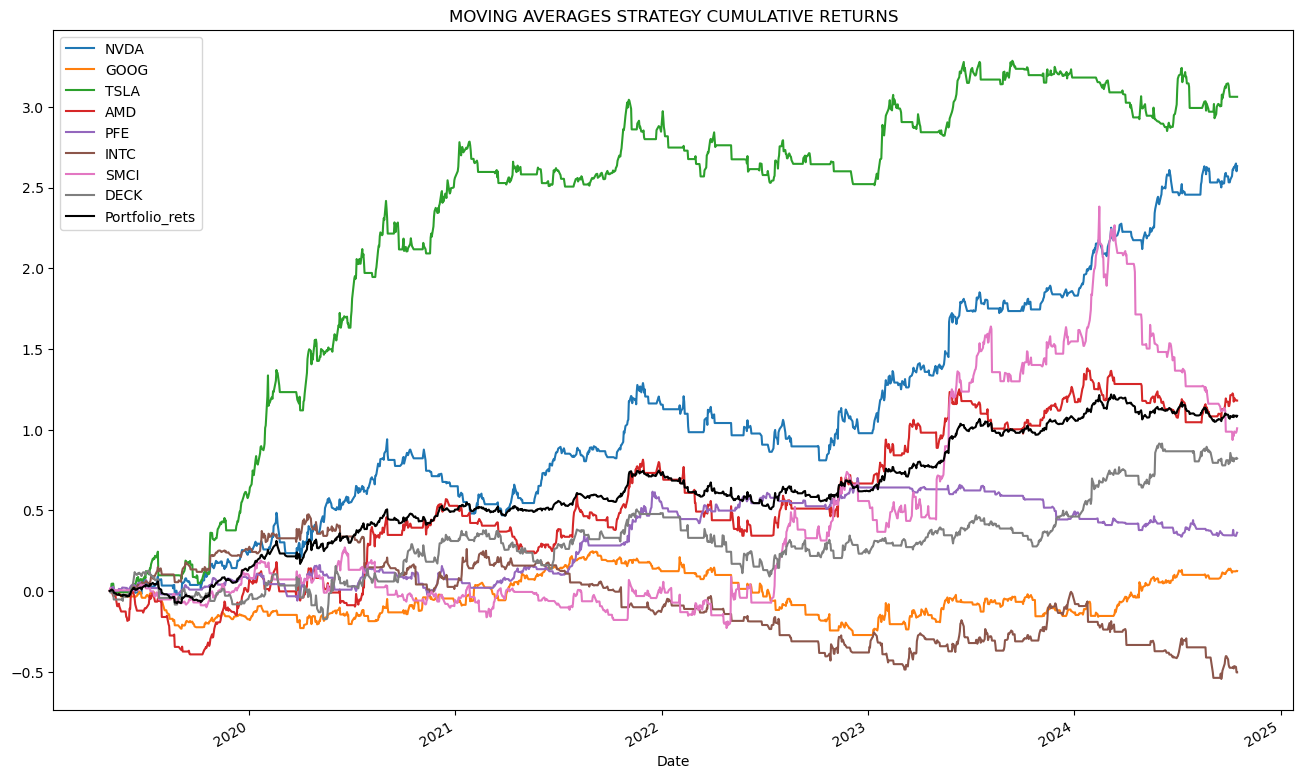

In [83]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'k']
plt.figure(figsize=(16, 10))
portfolio_strategy_returns.cumsum().plot(figsize=(16, 10), title="MOVING AVERAGES STRATEGY CUMULATIVE RETURNS", color=colors)
plt.savefig('cumulative_returns_plot.png')  # Save plot as an image

## Saving Our Excel Output

This will create an Excel file (performance_output_with_graph.xlsx) with both the performance data and the cumulative returns plot embedded in the sheet.

In [84]:
output_file = 'performance_output_with_graph.xlsx'

with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    # Write the DataFrame to the Excel file
    perf.to_excel(writer, sheet_name='Performance', index=False)

    # Access the workbook and worksheet objects
    workbook = writer.book
    worksheet = writer.sheets['Performance']

    # Optionally format the 'Cumulative returns' as percentages
    percentage_format = workbook.add_format({'num_format': '0.00%'})
    worksheet.set_column('B:B', 18, percentage_format)  # Format 'Cumulative returns' column

    # Adjust column widths for better readability
    worksheet.set_column('A:A', 15)  # Symbols column width
    worksheet.set_column('C:C', 25)  # Annualized Sharpe Ratio column width

    # Insert the cumulative returns plot image into the Excel file
    worksheet.insert_image('E2', 'cumulative_returns_plot.png', {'x_scale': 0.5, 'y_scale': 0.5})